<a href="https://colab.research.google.com/github/D1290-Ali/Data-Science/blob/main/DVwPY/Assignments/Assignment_1_student_1290.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [29]:
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

## 1: Plot number of people by gender

In [30]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


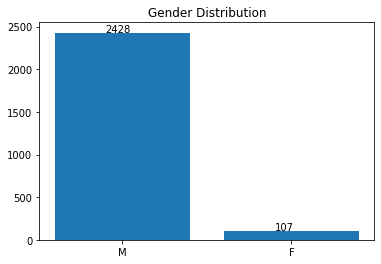

In [31]:
killer = kill.gender.unique()
value_killer = kill.gender.value_counts().values
fig, ax = plt.subplots()
ax.bar(killer,value_killer)
ax.set_title("Gender Distribution")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));


In [32]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [33]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

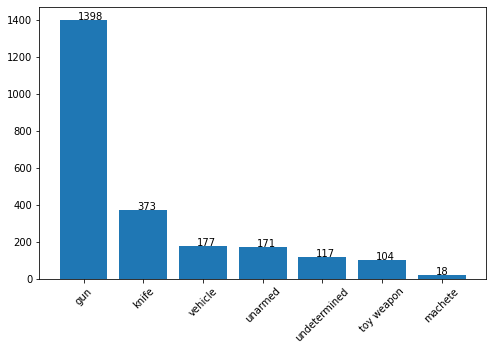

In [34]:
p = kill.armed.value_counts().index[:7]
q = kill.armed.value_counts().values[:7]
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(p,q)
ax.set_xticklabels(p, rotation=45)
for s in ax.patches:
    ax.annotate((s.get_height()), (s.get_x()+0.3, s.get_height()+1))


In [35]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [36]:
kill[(kill["age"]<25) | (kill["age"]>25)].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [68]:
kill.loc[kill['age']<= 25, 'age_cat'] = "below25"
kill.loc[kill['age']> 25, 'age_cat'] = "above25"


In [67]:
kill.tail(20).T

,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534
id,2798,2801,2802,2803,2805,2804,2806,2807,2808,2816,2820,2809,2811,2812,2819,2822,2813,2818,2817,2815
name,Jerrod Kershaw,Alexander J. Schoessel,Michael Joseph Harris,Moises Balladares,Aries Clark,TK TK,TK TK,Susan Teel,Kesharn K. Burney,Jerauld Phillip Hammond II,Deltra Henderson,Sergio Velasco-Martinez,Matthew Folden,Alejandro Alvarado,Brian J. Skinner,Rodney E. Jacobs,TK TK,Dennis W. Robinson,Isaiah Tucker,Dwayne Jeune
date,24/07/17,25/07/17,25/07/17,25/07/17,25/07/17,26/07/17,26/07/17,26/07/17,26/07/17,27/07/17,27/07/17,27/07/17,27/07/17,27/07/17,28/07/17,28/07/17,28/07/17,29/07/17,31/07/17,31/07/17
manner_of_death,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot
armed,gun,ax,gun,gun,undetermined,gun,gun,knife,vehicle,gun,gun,blunt object,knife,knife,knife,gun,vehicle,gun,vehicle,knife
age,31.0,23.0,28.0,33.0,16.0,35.0,NaN,62.0,25.0,46.0,39.0,25.0,31.0,NaN,32.0,31.0,NaN,48.0,28.0,32.0
gender,M,M,M,M,M,M,M,F,M,M,M,M,M,M,M,M,M,M,M,M
race,W,W,W,NaN,B,NaN,NaN,NaN,B,NaN,B,NaN,NaN,H,NaN,NaN,NaN,NaN,B,B
city,St. Louis,Richmond,Jacksonville,Avondale,Marion,Phoenix,San Antonio,Vero Beach,Dayton,Los Angeles,Homer,Avenal,Wenatchee,Chowchilla,Glenville,Kansas City,Albuquerque,Melba,Oshkosh,Brooklyn
state,MO,VA,FL,AZ,AR,AZ,TX,FL,OH,CA,LA,CA,WA,CA,NY,MO,NM,ID,WI,NY


In [69]:
kill.age_cat.unique()

array(['above25', 'below25'], dtype=object)

In [70]:
kill.age_cat.value_counts().values

array([1905,  630], dtype=int64)

In [71]:
kill.age_cat.fillna("below25", inplace = True)

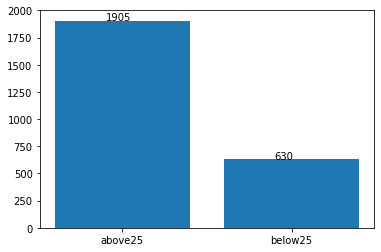

In [73]:
tt = kill.age_cat.unique()
ff = kill.age_cat.value_counts().values
fig, ax = plt.subplots()
ax.bar(tt,ff)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+5));

In [43]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [74]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [45]:
a = kill.race.unique()
a

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [75]:
 kill.race.value_counts(dropna=False).values

array([1201,  618,  423,  195,   39,   31,   28], dtype=int64)

Text(0.5, 1.0, 'Race of killed people')

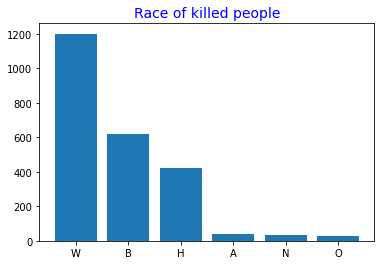

In [76]:
rr = kill.race.value_counts().index
yy = kill.race.value_counts().values
fig, ax = plt.subplots()
ax.bar(rr,yy)
ax.set_title("Race of killed people", color="b", size=14)

In [48]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [77]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [78]:
# kill.race.unique()
kill.race.value_counts(dropna=False).index

Index(['W', 'B', 'H', nan, 'A', 'N', 'O'], dtype='object')

In [79]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [80]:
dr= kill.dropna()
dr

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,below25
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,below25
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [81]:
dr.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [82]:
dr.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [83]:
dr.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [84]:
dr.race.value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

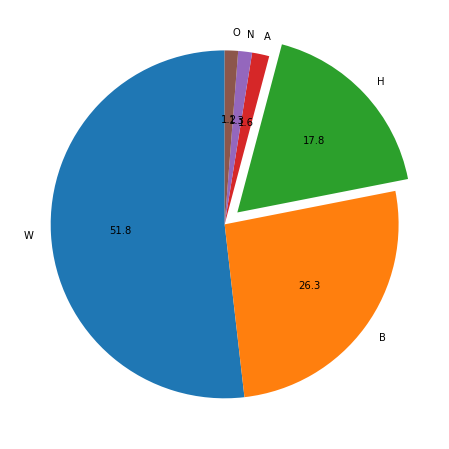

In [87]:
plt.figure(figsize=(10, 8))

m = dr.race.value_counts().values
mylabels = dr.race.value_counts().index

myexplode = [0, 0 , 0.1, 0, 0, 0]

plt.pie(m, labels = mylabels, explode=myexplode, labeldistance=1.1, autopct="%.1f", startangle=90)
# plt.legend()
plt.tight_layout
plt.show()

In [88]:
mylabels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')